In [1]:
import numpy as np
sim_results = open('./summary_processed.txt', 'r')
header = sim_results.readline().strip().split('\t')

data = []
for line in sim_results:
    row = line.strip().split('\t')
    data.append(row)

In [2]:
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
header

['Simulation',
 'Replicate',
 'Abundances',
 'Error_type',
 'Poiss_error',
 'Output_dir',
 'num_true_pos_bc',
 'num_false_pos_bc',
 'num_fals_neg_bc',
 'bc_tpr',
 'bc_fpr']

In [4]:
get_col = lambda row, entry: row[header.index(entry)]

def get_entries(data, abundance, error_type, errors = None):
    select_entries = []
    for row in data:
        if(get_col(row, 'Error_type') == error_type and get_col(row, 'Abundances') == abundance):
            if(errors == None):
                select_entries.append(row)
            else:
                if(int(get_col(row, 'Poiss_error')) == errors):
                    select_entries.append(row)
    return select_entries
        


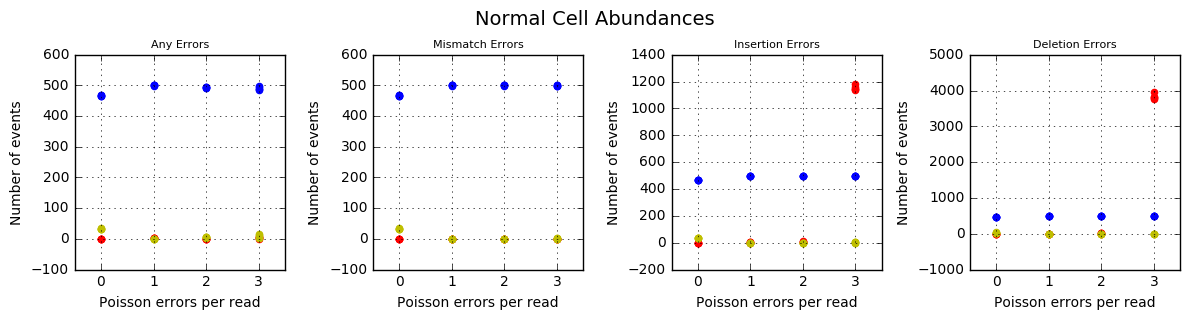

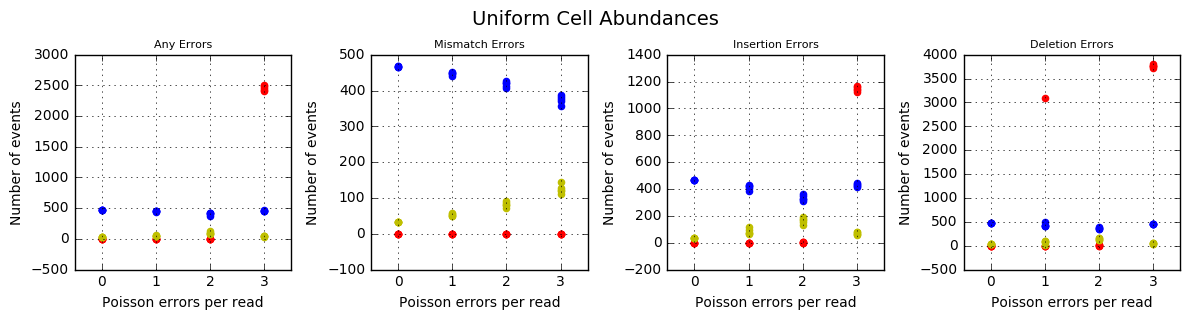

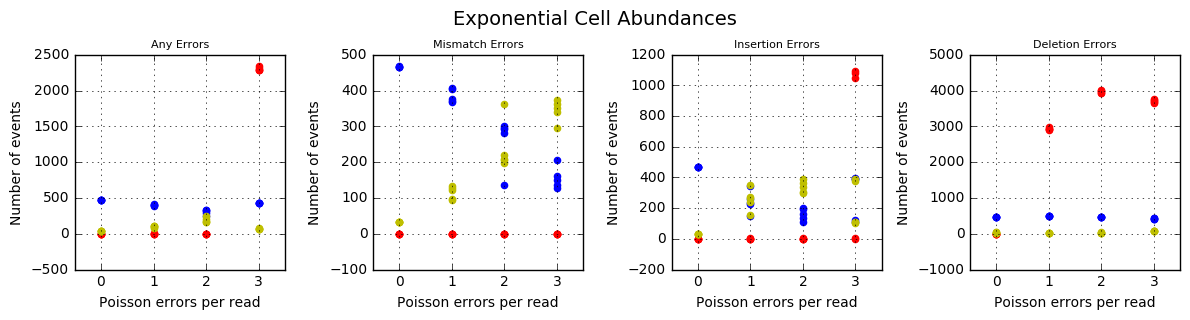

In [5]:
"""
plot poiss error (x) vs true pos, false pos, fase neg barcode calls
    separate subplots for each error type, abundance distr
"""
import itertools

abundances = ['normal', 'uniform', 'exponential']
error_type = ['any', 'mismatch', 'insertion', 'deletion']

for a in abundances:
    fig, ax_arr = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), sharex = True)
    for (i, e) in enumerate(error_type):
        ax = ax_arr[i]
        select_entries = get_entries(data, a, e)

        x = [int(get_col(i, 'Poiss_error')) for i in select_entries]
        y1 = [int(get_col(i, 'num_true_pos_bc')) for i in select_entries]
        y2 = [int(get_col(i, 'num_false_pos_bc')) for i in select_entries]
        y3 = [int(get_col(i, 'num_fals_neg_bc')) for i in select_entries]

        
        ax.scatter(x, y1, color='b', label='True positives')
        ax.scatter(x, y2, color='r', label='False positives')
        ax.scatter(x, y3, color='y', label='False negatives')
        ax.set_title( ('%s errors' % e).title(), fontsize=8)
        ax.set_ylabel('Number of events')
        ax.grid()
        ax.set_xlim([-0.5, 3.5])
        ax.set_xticks([0,1,2,3])
        ax.set_xlabel('Poisson errors per read')
    plt.suptitle(('%s cell abundances' % a).title(), size = 14, y = 1.05)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.9)
    plt.savefig('./errors_vs_tpr_fpr_%s.pdf' % a, bbox_inches='tight')

In [6]:
"""
LABELS
    Blue: true positive
    Red: false positive
    Yellow: false negative

"""

'\nLABELS\n    Blue: true positive\n    Red: false positive\n    Yellow: false negative\n\n'

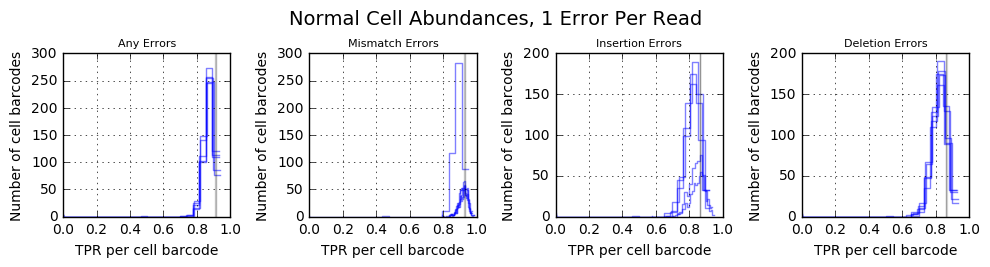

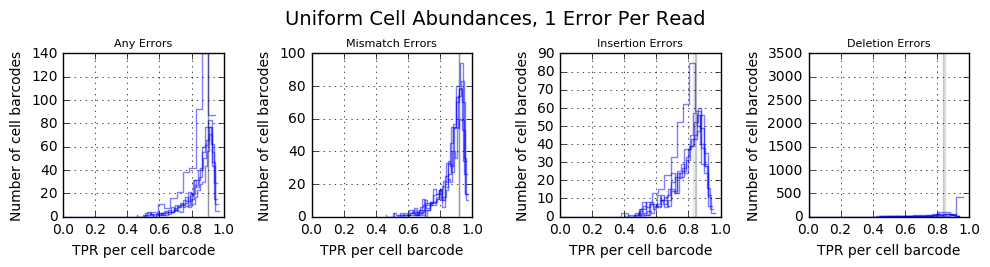

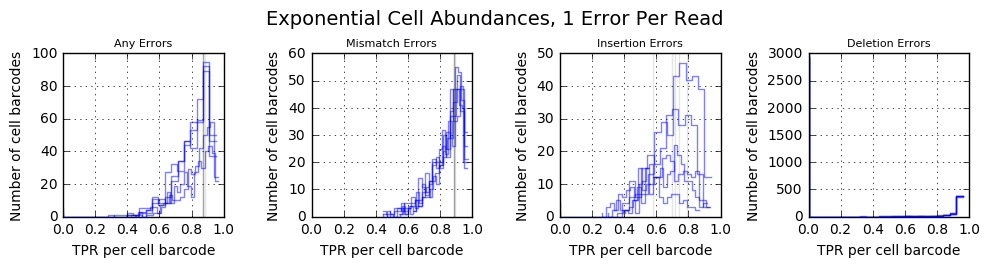

In [14]:
"""
1 errors

"""
errors = [1]
for a in abundances:
    fig, ax_arr = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
    for (ax, e) in zip(ax_arr, error_type):
        
        for err_num in errors:
            select_entries = get_entries(data, a, e, errors=err_num)
            tpr_entries = [get_col(i, 'bc_tpr') for i in select_entries] 
        
            for (j, tpr_entry) in enumerate(tpr_entries):
                y_data = [float(i) for i in tpr_entry.split(',')]
                hist, bins = np.histogram(y_data, bins=25)
                ax.step(bins[0:-1], hist, alpha = 0.5, color = 'b')
                ax.axvline(np.median(y_data), color = 'k', alpha = 0.1)
            
        ax.set_title( ('%s errors' % e).title(), fontsize=8)
        ax.set_xlabel('TPR per cell barcode')
        ax.set_ylabel('Number of cell barcodes')
        ax.set_xlim([0,1])
        ax.grid()
        #ax.set_ylim([-50, 550])
    fig.suptitle(('%s cell abundances, %i error per read' % (a, 1)).title(), y = 1.05, size = 14)
    plt.tight_layout()
    fig.savefig('./TPR_histo_1_error_%s.pdf' % a, bbox_inches='tight')

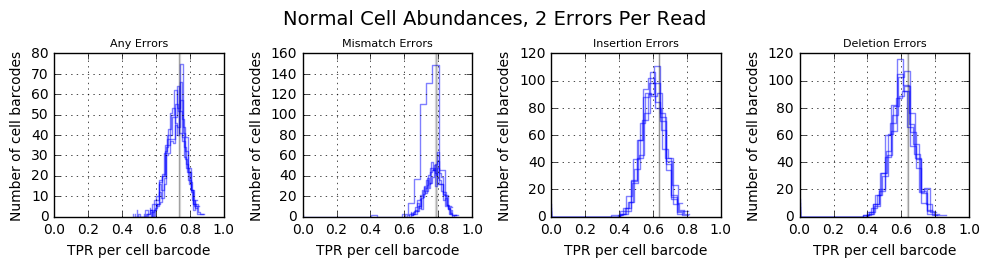

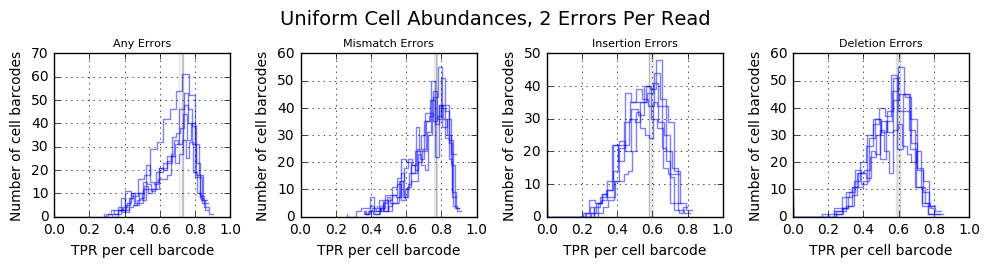

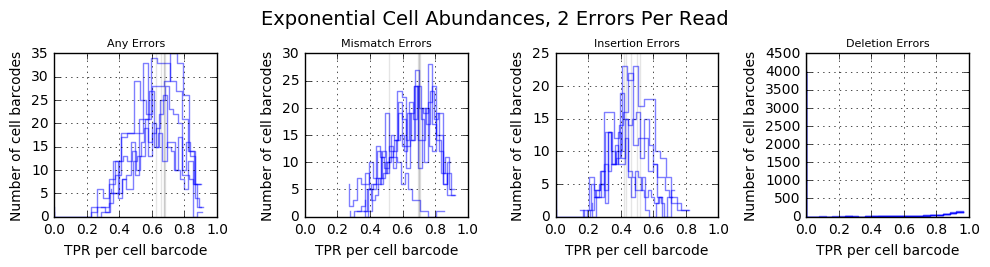

In [12]:
"""
2 errors

"""
errors = [2]
for a in abundances:
    fig, ax_arr = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
    for (ax, e) in zip(ax_arr, error_type):
        
        for err_num in errors:
            select_entries = get_entries(data, a, e, errors=err_num)
            tpr_entries = [get_col(i, 'bc_tpr') for i in select_entries] 
        
            for (j, tpr_entry) in enumerate(tpr_entries):
                y_data = [float(i) for i in tpr_entry.split(',')]
                hist, bins = np.histogram(y_data, bins=25)
                ax.step(bins[0:-1], hist, alpha = 0.5, color = 'b')
                ax.axvline(np.median(y_data), color = 'k', alpha = 0.1)
            
        ax.set_title( ('%s errors' % e).title(), fontsize=8)
        ax.set_xlabel('TPR per cell barcode')
        ax.set_ylabel('Number of cell barcodes')
        ax.set_xlim([0,1])
        ax.grid()
        #ax.set_ylim([-50, 550])
    fig.suptitle(('%s cell abundances, %i errors per read' % (a, 2)).title(), y = 1.05, size = 14)
    plt.tight_layout()
    fig.savefig('./TPR_histo_2_errors_%s.pdf' % a, bbox_inches='tight')

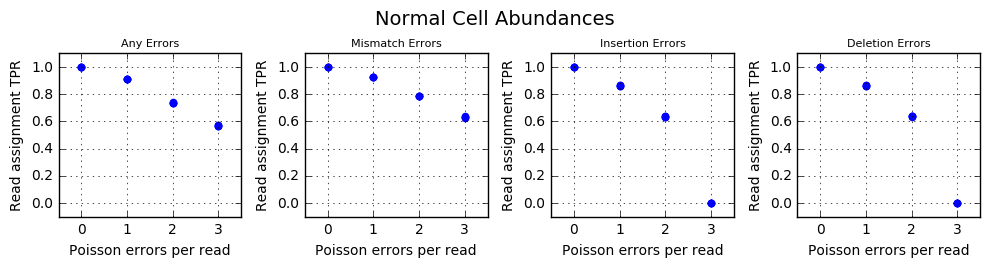

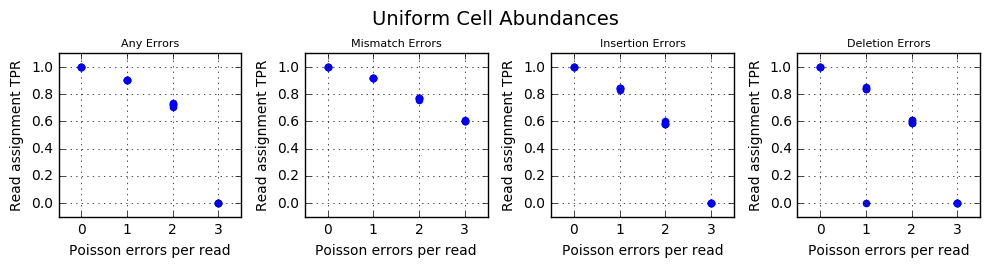

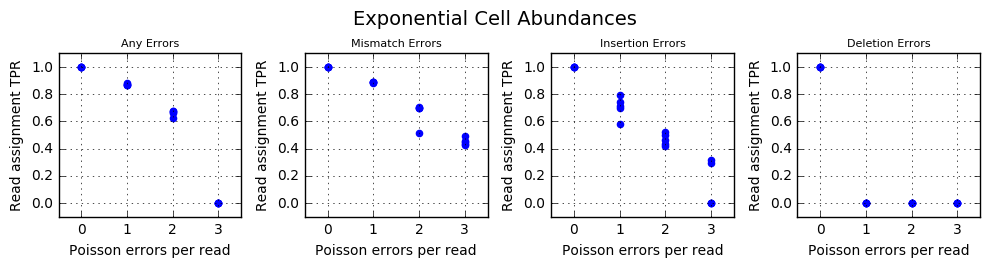

In [11]:
cmap = plt.get_cmap('jet', 20)

errors = [0, 1, 2, 3, 4]



for a in abundances:
    fig, ax_arr = plt.subplots(nrows=1, ncols=4, figsize=(10,2.5))
    for (ax, e) in zip(ax_arr, error_type):
        x = []
        medians = []
        for err_num in errors:
        
            select_entries = get_entries(data, a, e, errors=err_num)
            tpr_entries = [get_col(i, 'bc_tpr') for i in select_entries] 
        
            for (j, tpr_entry) in enumerate(tpr_entries):
                y_data = [float(i) for i in tpr_entry.split(',')]
                
                x.append(err_num)
                medians.append(np.median(y_data))
        ax.scatter(x, medians, color = 'b')
        ax.set_title( ('%s errors' % e).title(), fontsize=8)
        ax.set_xlabel('Poisson errors per read')
        ax.set_ylabel('Read assignment TPR')
        ax.set_ylim([-0.1, 1.1])
        ax.set_xlim([-0.5, 3.5])
        ax.set_xticks([0,1,2,3])
        ax.grid()
    fig.suptitle( ('%s cell abundances' % a).title(), size = 14, y = 1.05)
    plt.tight_layout()
    fig.savefig('./TPR_vs_errors_%s.pdf' % a, bbox_inches='tight')